# Distances and Angles between Images

We are going to compute distances and angles between images.

## Learning objectives
By the end of this notebook, you will learn to 

1. Write programs to compute distance.
2. Write programs to compute angle.

"distance" and "angle" are useful beyond their usual interpretation. They are useful for describing __similarity__ between objects. You will
first use the functions you wrote to compare MNIST digits. Furthermore, we will use these concepts for implementing the K Nearest Neighbors algorithm, which is a useful algorithm for classifying object according to distance.

In [29]:
# PACKAGE: DO NOT EDIT THIS CELL
import numpy as np
import scipy

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from ipywidgets import interact
from load_data import load_mnist

# Plot figures so that they can be shown in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

The next cell loads the MNIST digits dataset.

In [31]:
from load_data import load_mnist
MNIST = load_mnist('./')

images = MNIST['data'].astype(np.double)
labels = MNIST['target'].astype(np.int)


For this assignment, you need to implement the two functions (`distance` and `angle`) in the cell below which compute the distance and angle between two vectors.

### Distances

In [32]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def distance(x0, x1):
    """Compute distance between two vectors x0, x1 using the dot product.
    
    
    Args:
    x0, x1: ndarray of shape (D,) to compute distance between. 
    
    Returns:
    the distance between the x0 and x1.
    """
    v=x0-x1
    dist=np.sqrt(np.dot(v,v))
    return dist
    # YOUR CODE HERE
    ### Uncomment and modify the code below
#     distance = -1 # <-- EDIT THIS to compute the distance between x0 and x1
#     return distance

In [33]:
# Some sanity checks, you may want to have more interesting test cases to test your implementation
a = np.array([1, 0])
b = np.array([0, 1])
np.testing.assert_allclose(distance(a, b), np.sqrt(2), rtol=1e-7)

a = np.array([1, 0])
b = np.array([1., np.sqrt(3)])
np.testing.assert_allclose(distance(a, b), np.sqrt(3), rtol=1e-7)

In [34]:
# Some hidden tests below
...

### Angles

In [35]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def angle(x0, x1):
    """Compute the angle between two vectors x0, x1 using the dot product.
    
    Args:
    x0, x1: ndarray of shape (D,) to compute the angle between. 
    
    Returns:
    the angle between the x0 and x1.
    """
    x_l=np.sqrt(np.dot(x0,x0))
    y_l=np.sqrt(np.dot(x1,x1))
    x_y=np.dot(x0,x1)
    angle=x_y/(x_l * y_l)
    angle=np.arccos(angle)
    return angle
    # YOUR CODE HERE
    ### Uncomment and modify the code below
#     angle = -1 # <-- EDIT THIS to compute angle between x0 and x1
#     return angle

In [36]:
# Some sanity checks, you may want to have more interesting test cases to test your implementation
a = np.array([1, 0])
b = np.array([0, 1])
np.testing.assert_allclose(angle(a,b) / (np.pi * 2) * 360., 90)

a = np.array([1, 0])
b = np.array([1., np.sqrt(3)])
np.testing.assert_allclose(angle(a,b) / (np.pi * 2) * 360., 60., rtol=1e-4)

In [37]:
# Some hidden tests below

We have created some helper functions for you to visualize vectors in the cells below. You do not need to modify them.

In [38]:
def plot_vector(v, w):
    """Plot two 2D vectors."""
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');
    ax.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');

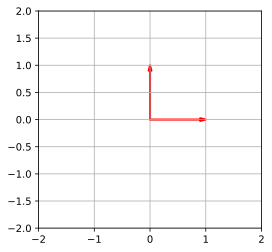

In [39]:
a = np.array([1, 0])
b = np.array([0, 1])
plot_vector(b, a)

In [40]:
# Tests symmetry
random = np.random.RandomState(42)
x = random.randn(3)
y = random.randn(3)
for _ in range(10):
    np.testing.assert_allclose(distance(x,y), distance(y,x))
    np.testing.assert_allclose(angle(x,y), angle(y,x), rtol=1e-4)

The next cell shows some digits from the dataset.

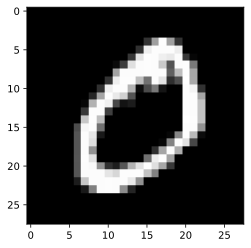

In [41]:
plt.imshow(images[labels==0].reshape(-1, 28, 28)[0], cmap='gray');

But we have the following questions:

1. What does it mean for two digits in the MNIST dataset to be _different_ by our distance function? 
2. Furthermore, how are different classes of digits different for MNIST digits? Let's find out!

For the first question, we can see just how the distance between digits compare among all distances for 
the first 500 digits. The next cell computes pairwise distances between images.

In [42]:
distances = []
for i in range(len(images[:500])):
    for j in range(len(images[:500])):
        distances.append(distance(images[i], images[j]))

In [43]:
@interact(first=(0, 499), second=(0, 499), continuous_update=False)
def show_img(first, second):
    plt.figure(figsize=(8,4))
    f = images[first].reshape(28, 28)
    s = images[second].reshape(28, 28)
    
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    #plt.imshow(np.hstack([f,s]), cmap='gray')
    ax0.imshow(f, cmap='gray')
    ax1.imshow(s, cmap='gray')
    ax2.hist(np.array(distances), bins=50)
    d = distance(f.ravel(), s.ravel())
    ax2.axvline(x=d, ymin=0, ymax=40000, color='C4', linewidth=4)
    ax2.text(0, 16000, "Distance is {:.2f}".format(d), size=12)
    ax2.set(xlabel='distance', ylabel='number of images')
    plt.show()

interactive(children=(IntSlider(value=249, description='first', max=499), IntSlider(value=249, description='se…

Next we will find the index of the most similar image to the image at index 0.
We will do this by writing some code in another cell.

Write some code in this scratch cell below to find out the most similar image

In [44]:
### Scratch cell for you to compute the index of the most similar image
distances = np.zeros((500))
for i in range(500):
    # Write some code to compute the distance between 0th and ith image.
    distances[i]=distance(images[0],images[i])
print(np.argmin(np.array(distances)[1:]) + 1)  # Add one since we excluded the 0th image.

61


Then copy the solution you found (an index value) and replace the -1 in the function `most_similar_image` with this value. Don't perform any computation in the next cell that accesses the dataset as the autograder will not have access to the dataset and will raise an error.

In [45]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def most_similar_image():
    """Find the index of the digit, among all MNIST digits (excluding the first),
       that is the closest to the first image in the dataset, your answer should be a single integer
    """
    distances = np.zeros((500))
    for i in range(500):
    # Write some code to compute the distance between 0th and ith image.
        distances[i]=distance(images[0],images[i])

        idx = np.argmin(np.array(distances)[1:]) + 1
    return idx

In [46]:
# Some hidden tests below

For the second question, we can compute a `mean` image for each class of image, i.e. we compute mean image for digits of `1`, `2`, `3`,..., `9`, then we compute pairwise distance between them. We can organize the pairwise distances in a 2D plot, which would allow us to visualize the dissimilarity between images of different classes.

First we compute the mean for digits of each class.

In [47]:
mean_images = {}
for n in np.unique(labels):
    mean_images[n] = np.mean(images[labels==n], axis=0)

For each pair of classes, we compute the pairwise distance and 
store them into MD (mean distances). We store the angles between the mean digits in AG

In [48]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))
for i in mean_images.keys():
    for j in mean_images.keys():
        MD[i, j] = distance(mean_images[i], mean_images[j])
        AG[i, j] = angle(mean_images[i].ravel(), mean_images[j].ravel())

C:\Users\nikhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()


Now we can visualize the distances! Here we put the pairwise distances. The colorbar
shows how the distances map to color intensity.

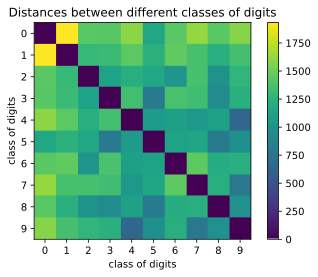

In [49]:
fig, ax = plt.subplots()
grid = ax.imshow(MD, interpolation='nearest')
ax.set(title='Distances between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show()

Similarly for the angles.

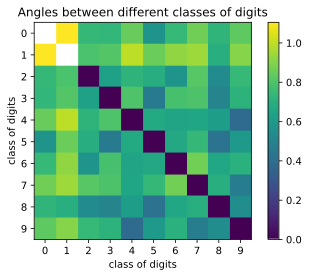

In [50]:
fig, ax = plt.subplots()
grid = ax.imshow(AG, interpolation='nearest')
ax.set(title='Angles between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show();